In [60]:
import os
import pandas as pd
import gmaps
from config import gkey
import matplotlib.pyplot as plt
import requests
import json
gmaps.configure(api_key=gkey)

In [61]:
summary_df = pd.read_csv("byzip.csv", converters={'Provider Zip Code': lambda x: str(x)})

summary_df = byzip_df.rename(columns={"Provider Zip Code": "Zipcode"})

censusdata = pd.read_csv("Full_ZH_Info.csv", converters={'Zipcode': lambda x: str(x)})


correct_zips = []
for zipcode in summary_df["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
summary_df["Zipcode"] = correct_zips    
print(len(correct_zips))

summary_df = summary_df.merge(censusdata, on="Zipcode")

summary_df_dropna = summary_df.dropna()

len(summary_df_dropna)
summary_df

2931


,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference,State,Urban Type,Center Point Lat,Center Point Lng,Population,...,Pvty Rate,Unemployed Rate,Pov_Group,Pov_Pct,ID,Near_Hosp,Near_Hos_Zip,Near_Hos_Lat,Near_Hos_Lng,Hosp_Dist
0,10003,72.719626,16867.592710,11566.621963,5300.970748,NY,Urbanized Area,40.731829,-73.989181,57112.0,...,8.593641,3.890601,White,70.354523,3.0,NEW YORK EYE AND EAR INFIRMARY,10003,40.731853,-73.984483,0.246590
1,10016,50.691176,20250.382426,11320.090221,8930.292206,NY,Urbanized Area,40.745221,-73.978294,50641.0,...,9.600916,3.447799,White,61.209379,2.0,NYU HOSPITALS CENTER,10016,40.742047,-73.973929,0.316923
2,10019,43.461538,17563.180096,11485.672404,6077.507692,NY,Urbanized Area,40.765823,-73.987179,38830.0,...,11.959825,3.906773,White,57.364341,2.0,THE ADDICTION INSTITUTE OF NEW YORK,10019,40.769412,-73.986808,0.248422
3,10021,108.977169,19834.264749,12282.212100,7552.052648,NY,Urbanized Area,40.769225,-73.958741,43573.0,...,6.350263,1.803869,White,87.387062,6.0,GRACIE SQUARE HOSPITAL,10021,40.769717,-73.953021,0.301969
4,10029,72.064000,19553.343280,11457.785120,8095.558160,NY,Urbanized Area,40.791763,-73.943970,79251.0,...,29.527703,5.703398,His,58.185548,1.0,METROPOLITAN HOSPITAL CENTER,10029,40.784927,-73.944530,0.472624
5,10037,21.041667,17266.700000,7976.664167,9290.035833,NY,Urbanized Area,40.812960,-73.937376,18777.0,...,28.673377,5.884859,Black,70.096582,1.0,HARLEM HOSPITAL CENTER,10037,40.814265,-73.939861,0.158380
6,10304,28.410714,15563.950000,10011.900714,5552.049286,NY,Urbanized Area,40.608497,-74.093239,42244.0,...,18.947069,3.243064,His,47.926037,2.0,STATEN ISLAND UNIV HOSP-CONCORD DIV,10304,40.603064,-74.091820,0.382233
7,10305,57.464646,15948.043535,11380.942020,4567.101515,NY,Urbanized Area,40.596691,-74.074866,41795.0,...,12.190453,3.387965,White,66.143278,2.0,STATEN ISLAND UNIV HOSP-CONCORD DIV,10304,40.603064,-74.091820,0.994229
8,10451,25.731707,24089.470244,8980.413415,15109.056829,NY,Urbanized Area,40.820454,-73.925066,48188.0,...,35.539968,6.175811,His,69.560902,1.0,LINCOLN HOSPITAL,10451,40.817173,-73.924377,0.229263
9,10456,25.777778,20708.122778,9035.673889,11672.448889,NY,Urbanized Area,40.829886,-73.908121,91868.0,...,41.175382,6.644316,His,61.545986,1.0,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,10456,40.831715,-73.904057,0.247581


In [62]:
censusdata = pd.read_csv("Full_ZH_Info.csv", converters={'Zipcode': lambda x: str(x)})

correct_zips = []
for zipcode in censusdata["Zipcode"]:
    while len(str(zipcode)) < 5:
        zipcode = "0" + str(zipcode)
    
    correct_zips.append(zipcode)
    
print(len(correct_zips))

censusdata["Zipcode"] = correct_zips

censusdata["Zipcode"] = censusdata["Zipcode"].astype(int)
summary_df["Zipcode"] = summary_df["Zipcode"].astype(int)

summary_df = summary_df.merge(censusdata)

summary_df

33120


,Zipcode,Total Discharges,Average Charge,National Average Charge,Difference,State,Urban Type,Center Point Lat,Center Point Lng,Population,...,Pvty Rate,Unemployed Rate,Pov_Group,Pov_Pct,ID,Near_Hosp,Near_Hos_Zip,Near_Hos_Lat,Near_Hos_Lng,Hosp_Dist
0,10003,72.719626,16867.592710,11566.621963,5300.970748,NY,Urbanized Area,40.731829,-73.989181,57112.0,...,8.593641,3.890601,White,70.354523,3.0,NEW YORK EYE AND EAR INFIRMARY,10003,40.731853,-73.984483,0.246590
1,10016,50.691176,20250.382426,11320.090221,8930.292206,NY,Urbanized Area,40.745221,-73.978294,50641.0,...,9.600916,3.447799,White,61.209379,2.0,NYU HOSPITALS CENTER,10016,40.742047,-73.973929,0.316923
2,10019,43.461538,17563.180096,11485.672404,6077.507692,NY,Urbanized Area,40.765823,-73.987179,38830.0,...,11.959825,3.906773,White,57.364341,2.0,THE ADDICTION INSTITUTE OF NEW YORK,10019,40.769412,-73.986808,0.248422
3,10021,108.977169,19834.264749,12282.212100,7552.052648,NY,Urbanized Area,40.769225,-73.958741,43573.0,...,6.350263,1.803869,White,87.387062,6.0,GRACIE SQUARE HOSPITAL,10021,40.769717,-73.953021,0.301969
4,10029,72.064000,19553.343280,11457.785120,8095.558160,NY,Urbanized Area,40.791763,-73.943970,79251.0,...,29.527703,5.703398,His,58.185548,1.0,METROPOLITAN HOSPITAL CENTER,10029,40.784927,-73.944530,0.472624
5,10037,21.041667,17266.700000,7976.664167,9290.035833,NY,Urbanized Area,40.812960,-73.937376,18777.0,...,28.673377,5.884859,Black,70.096582,1.0,HARLEM HOSPITAL CENTER,10037,40.814265,-73.939861,0.158380
6,10304,28.410714,15563.950000,10011.900714,5552.049286,NY,Urbanized Area,40.608497,-74.093239,42244.0,...,18.947069,3.243064,His,47.926037,2.0,STATEN ISLAND UNIV HOSP-CONCORD DIV,10304,40.603064,-74.091820,0.382233
7,10305,57.464646,15948.043535,11380.942020,4567.101515,NY,Urbanized Area,40.596691,-74.074866,41795.0,...,12.190453,3.387965,White,66.143278,2.0,STATEN ISLAND UNIV HOSP-CONCORD DIV,10304,40.603064,-74.091820,0.994229
8,10451,25.731707,24089.470244,8980.413415,15109.056829,NY,Urbanized Area,40.820454,-73.925066,48188.0,...,35.539968,6.175811,His,69.560902,1.0,LINCOLN HOSPITAL,10451,40.817173,-73.924377,0.229263
9,10456,25.777778,20708.122778,9035.673889,11672.448889,NY,Urbanized Area,40.829886,-73.908121,91868.0,...,41.175382,6.644316,His,61.545986,1.0,BRONX-LEBANON HOSPITAL CENTER - FULTON DIVISION,10456,40.831715,-73.904057,0.247581


In [63]:
#for x in summary_df["Difference"]:

summary_df_dropna['new'] = pd.Series([8678.906667 for x in range(len(summary_df_dropna.index))])

summary_df_dropna["Weight"] = summary_df_dropna["Difference"] + summary_df_dropna["new"]
len(summary_df_dropna)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


2588

In [64]:
locations = summary_df_dropna[["Center Point Lat", "Center Point Lng"]]
td = summary_df_dropna["Weight"].astype(float)

print(len(summary_df_dropna))
summary_df_dropna.to_csv("messy_summary.csv")

2588


In [65]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=td, 
                                 dissipating=False, max_intensity=47262,
                                 point_radius=.6)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

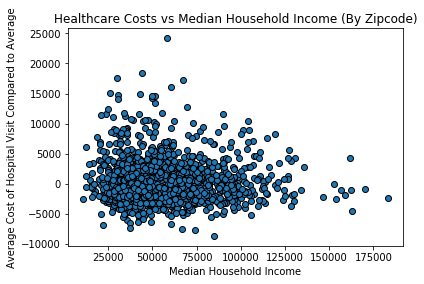

In [66]:
plt.scatter(summary_df["Household Income"], summary_df["Difference"], edgecolors="black")
plt.xlabel("Median Household Income")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Median Household Income (By Zipcode)")
plt.show
plt.savefig("cost_vs_income_zips.png")

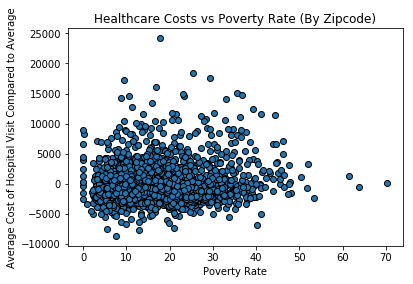

In [67]:
plt.scatter(summary_df["Pvty Rate"], summary_df["Difference"], edgecolors="black")
plt.xlabel("Poverty Rate")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Poverty Rate (By Zipcode)")
plt.show
plt.savefig("cost_vs_pvty_zips.png")

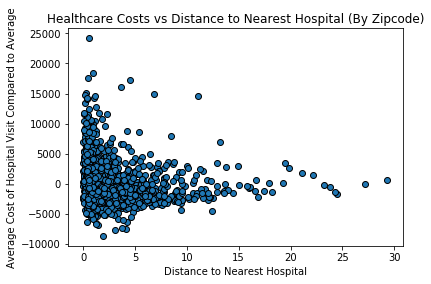

In [68]:
plt.scatter(summary_df["Hosp_Dist"], summary_df["Difference"], edgecolors="black")
plt.xlabel("Distance to Nearest Hospital")
plt.ylabel("Average Cost of Hospital Visit Compared to Average")
plt.title("Healthcare Costs vs Distance to Nearest Hospital (By Zipcode)")
plt.show
plt.savefig("cost_vs_distance.png")